#📖 Importando as Bibliotecas

In [1]:
# Importando pacotes e bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

#📌 Extracão

In [2]:
# LENDO A API E SALVANDO EM UMA VARIAVEL
url = 'https://raw.githubusercontent.com/ingridcristh/challenge2-data-science/refs/heads/main/TelecomX_Data.json'

In [3]:
# TRANSFORMANDO O A API EM UM DATAFRAME
df = pd.read_json(url)

In [4]:
# PRIMEIRA OLHADA NO DATAFRAME
df.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [5]:
# NORMALIZANDO  OS DADOS(Achei mais facil separalos em variaveis diferentes)
df_customer = pd.json_normalize(df['customer'])
df_phone = pd.json_normalize(df['phone'])
df_internet = pd.json_normalize(df['internet'])
df_account = pd.json_normalize(df['account'])
df_1 = df[['customerID','Churn']]

In [6]:
# DEPOIS DE NORMALIZADOS, CONCATENANDO O DATAFRAME
df = pd.concat([df_1,df_customer, df_phone, df_internet, df_account], axis=1)

#🔧 Transformação

In [7]:
# VERIFICANDO AS PRIMEIRAS LINHAS DO DATAFRAME
df.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [8]:
# VERIFICANDO AS ULTIMAS LINHAS DO DATAFRAME
df.tail()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.9
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65
7266,9995-HOTOH,No,Male,0,Yes,Yes,63,No,No phone service,DSL,...,Yes,Yes,No,Yes,Yes,Two year,No,Electronic check,59.00,3707.6


In [9]:
# VERIFICAÇÃO INFORMAÇÃO DE DADOS
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [10]:
# VERIFICANDO SHAPE DO DATAFRAME
print(f'O Dataframe possui {df.shape[0]} linhas e {df.shape[1]} colunas.')

O Dataframe possui 7267 linhas e 21 colunas.


In [11]:
# VERIFICANDO AS COLUNAS
df.columns

Index(['customerID', 'Churn', 'gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'tenure', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Charges.Monthly',
       'Charges.Total'],
      dtype='object')

In [12]:
# RENOMEANDO AS COLUNAS
df.rename(columns=({'customerID': 'ConsumidorID', 'Churn': 'Cancelamento',
                    'gender': 'Genero',	'SeniorCitizen': 'Idoso',	'Partner': 'Parceiro',
                    'Dependents': 'Dependentes', 'tenure': 'Permanencia', 'PhoneService': 'Servico_Telefonico',
                    'MultipleLines': 'Multiplas_Linhas',	'InternetService': 'Servico_Internet',	'OnlineBackup': 'Backup_Online',
                    'OnlineSecurity': 'Seguranca_Online', 'DeviceProtection': 'Protecao_Dispositivo',	'TechSupport': 'Suporte_Tecnico',
                    'StreamingTV': 'Tv_a_Cabo', 'StreamingMovies': 'Assinatura_Filmes',	'Contract': 'Contrato','PaperlessBilling': 'Fatura_Online',
                    'PaymentMethod': 'Metodo_Pagamento','Charges.Monthly': 'Contas_Mensal',	'Charges.Total': 'Contas_Total'}), inplace=True)

In [13]:
# VERIDICANDO DUPLICIDADE DO DATAFRAME
df.duplicated().sum()

np.int64(0)

In [14]:
# VERIFICANDO VALORES UNICOS DE CADA COLUNA
for i in df.columns:
  print(i)
  print(df[i].unique(),'\n')

ConsumidorID
['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH'] 

Cancelamento
['No' 'Yes' ''] 

Genero
['Female' 'Male'] 

Idoso
[0 1] 

Parceiro
['Yes' 'No'] 

Dependentes
['Yes' 'No'] 

Permanencia
[ 9  4 13  3 71 63  7 65 54 72  5 56 34  1 45 50 23 55 26 69 11 37 49 66
 67 20 43 59 12 27  2 25 29 14 35 64 39 40  6 30 70 57 58 16 32 33 10 21
 61 15 44 22 24 19 47 62 46 52  8 60 48 28 41 53 68 51 31 36 17 18 38 42
  0] 

Servico_Telefonico
['Yes' 'No'] 

Multiplas_Linhas
['No' 'Yes' 'No phone service'] 

Servico_Internet
['DSL' 'Fiber optic' 'No'] 

Seguranca_Online
['No' 'Yes' 'No internet service'] 

Backup_Online
['Yes' 'No' 'No internet service'] 

Protecao_Dispositivo
['No' 'Yes' 'No internet service'] 

Suporte_Tecnico
['Yes' 'No' 'No internet service'] 

Tv_a_Cabo
['Yes' 'No' 'No internet service'] 

Assinatura_Filmes
['No' 'Yes' 'No internet service'] 

Contrato
['One year' 'Month-to-month' 'Two year'] 

Fatura_Online
['Yes' 'No'] 

Metodo_Pa

In [15]:
# VERIFICANDO DADOS FORA DO PADRÃO ESPERADO
for i in df.columns:
  teste = df.query(f'{i} == "" or {i} == " "')
  print(teste.shape)

(0, 21)
(224, 21)
(0, 21)
(0, 21)
(0, 21)
(0, 21)
(0, 21)
(0, 21)
(0, 21)
(0, 21)
(0, 21)
(0, 21)
(0, 21)
(0, 21)
(0, 21)
(0, 21)
(0, 21)
(0, 21)
(0, 21)
(0, 21)
(11, 21)


In [16]:
# VERIFICANDO OS DADOS VAZIOS DA COLUNA CANCELAMENTO
df.query('Cancelamento == ""')
# por ser dados de Cancelamento que estão em branco não faz sentido mante-los

,ConsumidorID,Cancelamento,Genero,Idoso,Parceiro,Dependentes,Permanencia,Servico_Telefonico,Multiplas_Linhas,Servico_Internet,...,Backup_Online,Protecao_Dispositivo,Suporte_Tecnico,Tv_a_Cabo,Assinatura_Filmes,Contrato,Fatura_Online,Metodo_Pagamento,Contas_Mensal,Contas_Total
30,0047-ZHDTW,,Female,0,No,No,11,Yes,Yes,Fiber optic,...,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),79.00,929.3
75,0120-YZLQA,,Male,0,No,No,71,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Credit card (automatic),19.90,1355.1
96,0154-QYHJU,,Male,0,No,No,29,Yes,No,DSL,...,Yes,No,Yes,No,No,One year,Yes,Electronic check,58.75,1696.2
98,0162-RZGMZ,,Female,1,No,No,5,Yes,No,DSL,...,Yes,No,Yes,No,No,Month-to-month,No,Credit card (automatic),59.90,287.85
175,0274-VVQOQ,,Male,1,Yes,No,65,Yes,Yes,Fiber optic,...,Yes,Yes,No,Yes,Yes,One year,Yes,Bank transfer (automatic),103.15,6792.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7158,9840-GSRFX,,Female,0,No,No,14,Yes,Yes,DSL,...,Yes,No,No,No,No,One year,Yes,Mailed check,54.25,773.2
7180,9872-RZQQB,,Female,0,Yes,No,49,No,No phone service,DSL,...,No,No,No,Yes,No,Month-to-month,No,Bank transfer (automatic),40.65,2070.75
7211,9920-GNDMB,,Male,0,No,No,9,Yes,Yes,Fiber optic,...,No,No,No,No,No,Month-to-month,Yes,Electronic check,76.25,684.85
7239,9955-RVWSC,,Female,0,Yes,Yes,67,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),19.25,1372.9


In [17]:
# APAGANDO OS DADOS VAZIOS DA COLUNA CANCELAMENTO
df.query('Cancelamento != ""', inplace=True)

In [18]:
# VERIFICANDO OS DADOS VAZIOS DA COLUNA CONTAS_TOTAL
df.query('Contas_Total == " "')
# O valor total esta vazio, esse valor é esperado porque o tempo de contrato é 0, sendo assim não faz sentido manter esses dados.

,ConsumidorID,Cancelamento,Genero,Idoso,Parceiro,Dependentes,Permanencia,Servico_Telefonico,Multiplas_Linhas,Servico_Internet,...,Backup_Online,Protecao_Dispositivo,Suporte_Tecnico,Tv_a_Cabo,Assinatura_Filmes,Contrato,Fatura_Online,Metodo_Pagamento,Contas_Mensal,Contas_Total
975,1371-DWPAZ,No,Female,0,Yes,Yes,0,No,No phone service,DSL,...,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,
1775,2520-SGTTA,No,Female,0,Yes,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,
1955,2775-SEFEE,No,Male,0,No,Yes,0,Yes,Yes,DSL,...,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,
2075,2923-ARZLG,No,Male,0,Yes,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,
2232,3115-CZMZD,No,Male,0,No,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,
2308,3213-VVOLG,No,Male,0,Yes,Yes,0,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,
2930,4075-WKNIU,No,Female,0,Yes,Yes,0,Yes,Yes,DSL,...,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,
3134,4367-NUYAO,No,Male,0,Yes,Yes,0,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,
3203,4472-LVYGI,No,Female,0,Yes,Yes,0,No,No phone service,DSL,...,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,
4169,5709-LVOEQ,No,Female,0,Yes,Yes,0,Yes,No,DSL,...,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,


In [19]:
# APAGANDO OS DADOS VAZIOS DA COLUNA CONTAS_TOTAL.
# Convertendo em NaN e depois dropando eles
df['Contas_Total'] = df['Contas_Total'].replace(' ', np.nan)
df.dropna(inplace=True)

In [20]:
# CONVERTENDO A COLUNA CONTAS_TOTAL DE TIPO OBJECT EM TIPO FLOAT
df['Contas_Total'] = df['Contas_Total'].astype(np.float64)

In [21]:
# VERIFICANDO REDUNDANCIAS
df.groupby('Servico_Internet')[['Seguranca_Online','Backup_Online', 'Protecao_Dispositivo',	'Suporte_Tecnico', 'Tv_a_Cabo', 'Assinatura_Filmes']].value_counts()

Servico_Internet  Seguranca_Online     Backup_Online        Protecao_Dispositivo  Suporte_Tecnico      Tv_a_Cabo            Assinatura_Filmes  
DSL               No                   No                   No                    No                   No                   No                      294
                  Yes                  Yes                  Yes                   Yes                  Yes                  Yes                     143
                                       No                   No                    No                   No                   No                      106
                  No                   Yes                  No                    No                   No                   No                       97
                  Yes                  No                   Yes                   Yes                  Yes                  Yes                      79
                                                                                                                                                   ... 
Fiber optic       Yes                  Yes                  No                    Yes                  No                   Yes                       9
                                       No                   No                    Yes                  No                   Yes                       8
                                                                                                       Yes                  No                        7
                                                            Yes                   Yes                  Yes                  No                        3
No                No internet service  No internet service  No internet service   No internet service  No internet service  No internet service    1520
Name: count, Length: 129, dtype: int64

In [22]:
# CRIANDO UMA COLUNA PARA ARMAZENAR OS VALORES DIARIOS DE CADA CONSUMIDOR
df["Contas_Diarias"] = df.apply(lambda x: x['Contas_Mensal']/ 30, axis=1)

# UNIFICANDO VALORES (Eliminando redundâncias, sem internet, sem serviços de Internet)
lista = ['Seguranca_Online','Backup_Online', 'Protecao_Dispositivo',	'Suporte_Tecnico', 'Tv_a_Cabo', 'Assinatura_Filmes', 'Multiplas_Linhas']
for i in lista:
  df[i] = df[i].apply(lambda x: x.replace('No internet service', 'No').replace('No phone service', 'No'))

# TRATANDO OS DADOS DAS COLUNAS (Traduzindo as colunas)
df['Servico_Internet'] = df['Servico_Internet'].apply(lambda x: x.replace('No', 'Nenhum servico').replace('Fiber optic','Fibra Optica'))
df['Genero'] = df['Genero'].apply(lambda x: x.replace('Female', 'Feminino').replace('Male', 'Masculino'))
df['Contrato'] = df['Contrato'].apply(lambda x: x.replace('One year', 'Anual').replace('Month-to-month','Mensal').replace('Two year','Bi-Anual'))
df['Metodo_Pagamento'] = df['Metodo_Pagamento'].apply(lambda x: x.replace('Mailed check',
                                                                          'Cheque Correio').replace('Electronic check', 'Cheque Digital').replace('Credit card (automatic)',
                                                                          'Cartão Credito').replace('Bank transfer (automatic)','Transferencia bancaria'))
# MODIFICANDO OS DADOS BOOLEANOS DE STRINGS PARA NUMERICOS (Para melhorar as análises)
df = df.replace({'Yes': 1, 'No': 0})
df.head()

,ConsumidorID,Cancelamento,Genero,Idoso,Parceiro,Dependentes,Permanencia,Servico_Telefonico,Multiplas_Linhas,Servico_Internet,...,Protecao_Dispositivo,Suporte_Tecnico,Tv_a_Cabo,Assinatura_Filmes,Contrato,Fatura_Online,Metodo_Pagamento,Contas_Mensal,Contas_Total,Contas_Diarias
0,0002-ORFBO,0,Feminino,0,1,1,9,1,0,DSL,...,0,1,1,0,Anual,1,Cheque Correio,65.6,593.30,2.186667
1,0003-MKNFE,0,Masculino,0,0,0,9,1,1,DSL,...,0,0,0,1,Mensal,0,Cheque Correio,59.9,542.40,1.996667
2,0004-TLHLJ,1,Masculino,0,0,0,4,1,0,Fibra Optica,...,1,0,0,0,Mensal,1,Cheque Digital,73.9,280.85,2.463333
3,0011-IGKFF,1,Masculino,1,1,0,13,1,0,Fibra Optica,...,1,0,1,1,Mensal,1,Cheque Digital,98.0,1237.85,3.266667
4,0013-EXCHZ,1,Feminino,1,1,0,3,1,0,Fibra Optica,...,0,1,1,0,Mensal,1,Cheque Correio,83.9,267.40,2.796667


In [23]:
# VERIFICANDO VALORES UNICOS DE CADA COLUNA DEPOIS DO TRATAMENTO
for coluna in df.columns:
  print(coluna)
  print(df[coluna].unique())

ConsumidorID
['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']
Cancelamento
[0 1]
Genero
['Feminino' 'Masculino']
Idoso
[0 1]
Parceiro
[1 0]
Dependentes
[1 0]
Permanencia
[ 9  4 13  3 71 63  7 65 54 72  5 56 34  1 45 50 23 55 26 69 37 49 66 67
 20 43 59 12 27  2 25 29 14 35 64 39 40 11  6 30 70 57 58 16 32 33 10 21
 61 15 44 22 24 19 47 62 46 52  8 60 48 28 41 53 68 31 36 17 18 51 38 42]
Servico_Telefonico
[1 0]
Multiplas_Linhas
[0 1]
Servico_Internet
['DSL' 'Fibra Optica' 'Nenhum servico']
Seguranca_Online
[0 1]
Backup_Online
[1 0]
Protecao_Dispositivo
[0 1]
Suporte_Tecnico
[1 0]
Tv_a_Cabo
[1 0]
Assinatura_Filmes
[0 1]
Contrato
['Anual' 'Mensal' 'Bi-Anual']
Fatura_Online
[1 0]
Metodo_Pagamento
['Cheque Correio' 'Cheque Digital' 'Cartão Credito'
 'Transferencia bancaria']
Contas_Mensal
[65.6  59.9  73.9  ... 91.75 68.8  67.85]
Contas_Total
[ 593.3   542.4   280.85 ...  742.9  4627.65 3707.6 ]
Contas_Diarias
[2.18666667 1.99666667 2.46333333 ... 3.0583

In [24]:
# VERIFICANDO AS INFORMAÇOES DEPOIS DAS MODIFICAÇÕES
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ConsumidorID          7032 non-null   object 
 1   Cancelamento          7032 non-null   int64  
 2   Genero                7032 non-null   object 
 3   Idoso                 7032 non-null   int64  
 4   Parceiro              7032 non-null   int64  
 5   Dependentes           7032 non-null   int64  
 6   Permanencia           7032 non-null   int64  
 7   Servico_Telefonico    7032 non-null   int64  
 8   Multiplas_Linhas      7032 non-null   int64  
 9   Servico_Internet      7032 non-null   object 
 10  Seguranca_Online      7032 non-null   int64  
 11  Backup_Online         7032 non-null   int64  
 12  Protecao_Dispositivo  7032 non-null   int64  
 13  Suporte_Tecnico       7032 non-null   int64  
 14  Tv_a_Cabo             7032 non-null   int64  
 15  Assinatura_Filmes     7032

#📊 Carga e análise

In [25]:
# ANALISE ESTATISTICA DOS DADOS
df.describe()

,Cancelamento,Idoso,Parceiro,Dependentes,Permanencia,Servico_Telefonico,Multiplas_Linhas,Seguranca_Online,Backup_Online,Protecao_Dispositivo,Suporte_Tecnico,Tv_a_Cabo,Assinatura_Filmes,Fatura_Online,Contas_Mensal,Contas_Total,Contas_Diarias
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.265785,0.162400,0.482509,0.298493,32.421786,0.903299,0.421928,0.286547,0.344852,0.343857,0.290102,0.384386,0.388367,0.592719,64.798208,2283.300441,2.159940
std,0.441782,0.368844,0.499729,0.457629,24.545260,0.295571,0.493902,0.452180,0.475354,0.475028,0.453842,0.486484,0.487414,0.491363,30.085974,2266.771362,1.002866
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.608333
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.587500,401.450000,1.186250
50%,0.000000,0.000000,0.000000,0.000000,29.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,70.350000,1397.475000,2.345000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.862500,3794.737500,2.995417
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,118.750000,8684.800000,3.958333


In [26]:
# VERIFICANDO A PORCENTAGEM DE CHURN
porcentagem_cancelamento =( df['Cancelamento'].value_counts(normalize=True) * 100).round(2) # Parametro Normalize dentro do Values_counts retorna porcentagem

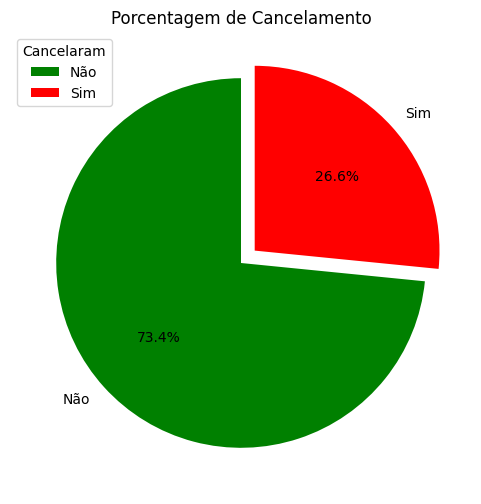

In [27]:
# VISUZALIZAÇÃO COM UM GRAFICO DE PIZZA PARA ENTENDER A EVASÃO DE CLIENTES

# Criado o plot
fig,ax = plt.subplots(figsize=(6, 6))
porcentagem_cancelamento.index = ['Não','Sim'] # Renomeando o index para plotagem
ax.pie(x=porcentagem_cancelamento, explode=[0, 0.1], labels=porcentagem_cancelamento.index, autopct='%1.1f%%', startangle=90, colors=['green','red'])
ax.set_title('Porcentagem de Cancelamento',fontsize= 12)
ax.legend(title='Cancelaram', loc='upper left')

fig.savefig('porcentagem_cancelamento.png')
plt.show()

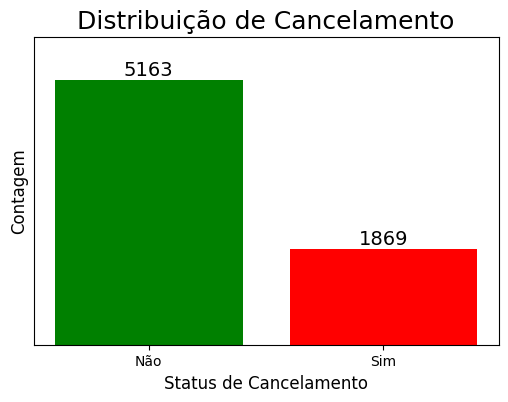

In [28]:
# CRIANDO VISUALIZAÇÃO DE QUANTOS CLIENTES CANCELARAM

# Criando uma variavel para guardar os dados da coluna Cancelamento
cancelamento = df['Cancelamento'].value_counts()

# Criando a Plotagem do Grafico
fig, ax = plt.subplots(figsize=(6, 4))
axis = ax.bar(x=cancelamento.index, height=cancelamento.values, color = ['g','r'])
ax.set_xticks(cancelamento.index)
ax.set_xticklabels(['Não', 'Sim'])

# Adicionando os rótulos de contagem acima das barras
for i in axis:
    v = i.get_height()
    ax.text(i.get_x() + i.get_width()/2.0, v, int(v), va='bottom', ha='center', fontsize=14)

# Configurando
plt.title('Distribuição de Cancelamento',fontsize= 18)
plt.xlabel('Status de Cancelamento',fontsize=12)
plt.ylabel('Contagem',fontsize=12)
plt.yticks([])
plt.ylim(0,6000)
plt.show()

In [29]:
# CRIANDO UM DATAFRAME APENAS COM DADOS DE CHURN CONFIRMADO
df_churn = df.query('Cancelamento == 1')

In [30]:
# QUANTO VALOR PERDIDOS DIARIAMENTE ($)
perdido_dias = df_churn['Contas_Diarias'].sum().round(2)
perdido_dias = f' {perdido_dias:,.2f}'.replace(',','x').replace('.',',').replace('x','.')
print(f'Total perdido por dia: ${perdido_dias}')

# QUANTO VALOR PERDIDOS MENSAL ($)
perdido_mensal = df_churn['Contas_Mensal'].sum().round(2)
perdido_mensal = f' {perdido_mensal:,.2f}'.replace(',','x').replace('.',',').replace('x','.')
print(f'Total perdido por Mês: ${perdido_mensal}')

# QUANTO VALOR PERDIDOS NO TOTAL ($)
total_perdido = df_churn['Contas_Total'].sum().round(2)
total_perdido = f' {total_perdido:,.2f}'.replace(',','x').replace('.',',').replace('x','.')
print(f'Total perdido em todo periodo: ${total_perdido}')

Total perdido por dia: $ 4.637,70
Total perdido por Mês: $ 139.130,85
Total perdido em todo periodo: $ 2.862.926,90


In [31]:
# VISUALIZAÇÃO GERAL COM MATRIZ DE CORRELAÇÃO

# Criando um dataframe apenas com dados numericos
df_numeric = df.select_dtypes(include=np.number)
# Plotando uma matriz de corrrelação de dos dados numericos
fig = px.imshow(df_numeric.corr(), title='Matriz de Correlação')
fig.update_layout(width= 900,height=700,title_x = 0.5)

fig.write_html('correlacao.html')
fig.show()

In [32]:
# VISUALIZAÇÃO GERAL COM MATRIZ DE CORRELAÇÃO CANCELAMENTO X CONTAS DIARIAS
cancel_x_diarias = df_numeric[['Cancelamento','Permanencia','Contas_Diarias','Contas_Total']]
fig = px.imshow(cancel_x_diarias.corr(), title='Correlação de Cancelamento X Diarias')
fig.update_layout(width= 400,height=400,title_x = 0.5)

fig.write_html('correlacao_cancel_x_diarias.html')
fig.show()

In [33]:
# CRIANDO UM DATAFRAME COM OS AS COLUNAS DE INTERESSE
df_categorico = df[['Cancelamento','Genero','Fatura_Online','Servico_Internet','Contrato','Metodo_Pagamento']]

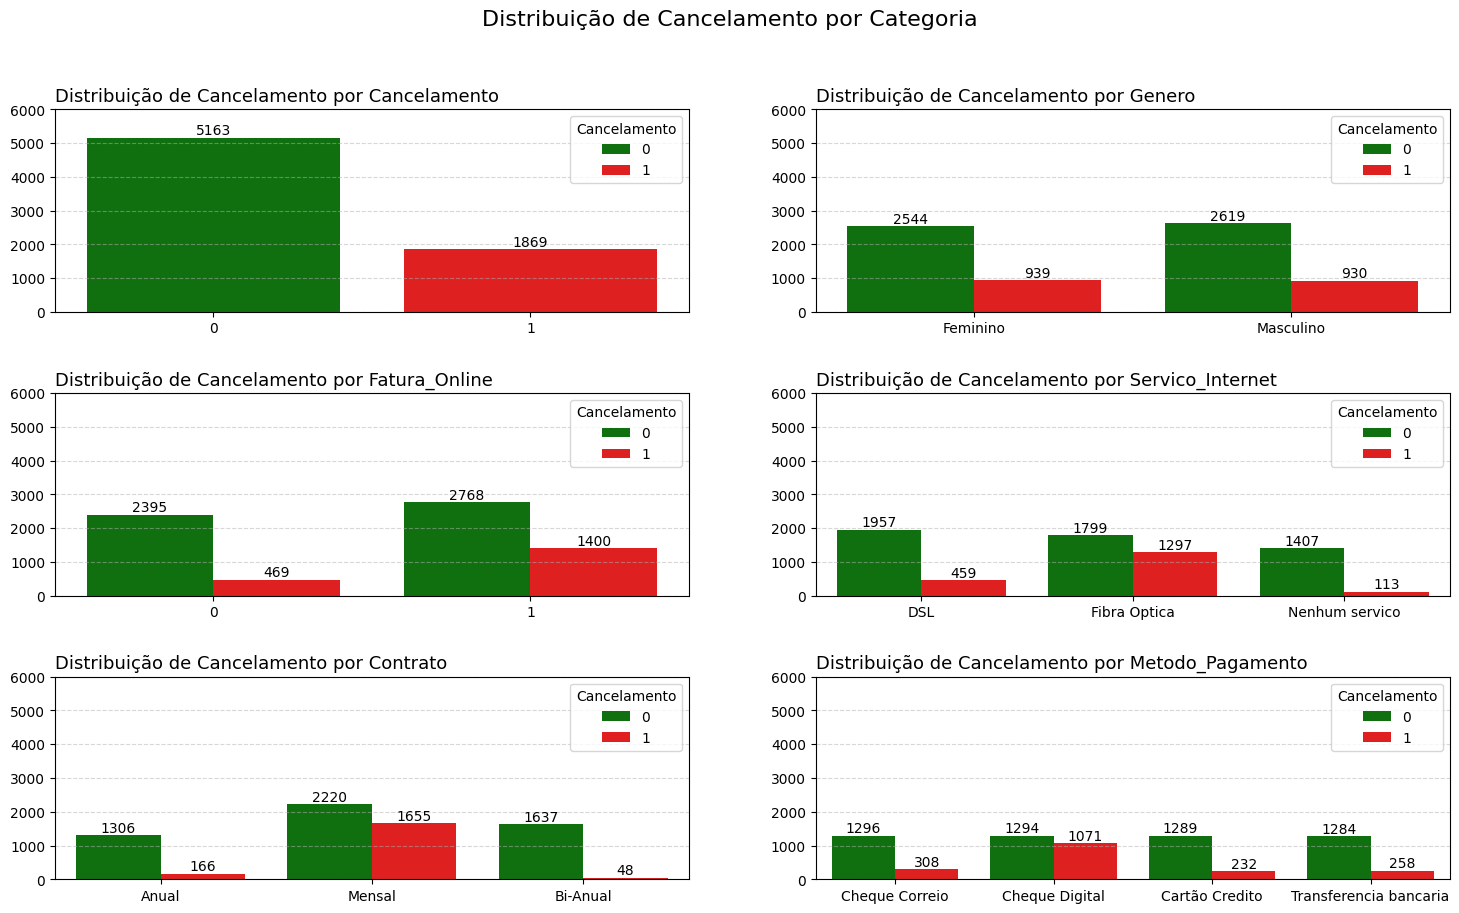

In [34]:
# CRIANDO VISUALISAÇÃO DE DISTRIBUIÇÃO CATEGORICA

# Configuração da figura
fig, axs = plt.subplots(3,2, figsize=(18,10))
fig.suptitle('Distribuição de Cancelamento por Categoria', fontsize=16)
fig.subplots_adjust(hspace=0.4, wspace=0.2)

# criando cada plot dentro da figura
for idx, coluna in enumerate(df_categorico.columns):
  row = idx // 2
  col = idx % 2

  # Configurando informações do plot
  sns.countplot(data=df_categorico, x=df_categorico[coluna], hue='Cancelamento', ax=axs[row, col],palette=['g','r'])

  # Adicionando os rótulos de contagem acima das barras para todas as barras
  for container in axs[row, col].containers:
    axs[row, col].bar_label(container)

  axs[row, col].set_title(f'Distribuição de Cancelamento por {coluna}', fontsize=13,loc='left')
  axs[row, col].set_xlabel('', fontsize=12)
  axs[row, col].set_ylabel('Contagem', fontsize=12)
  axs[row, col].set_ylabel('')
  axs[row,col].set_ylim(0,6000)
  axs[row,col].grid(axis='y', linestyle='--', alpha=0.5)

fig.savefig('distribuicao_cancelamento.png')
plt.show()

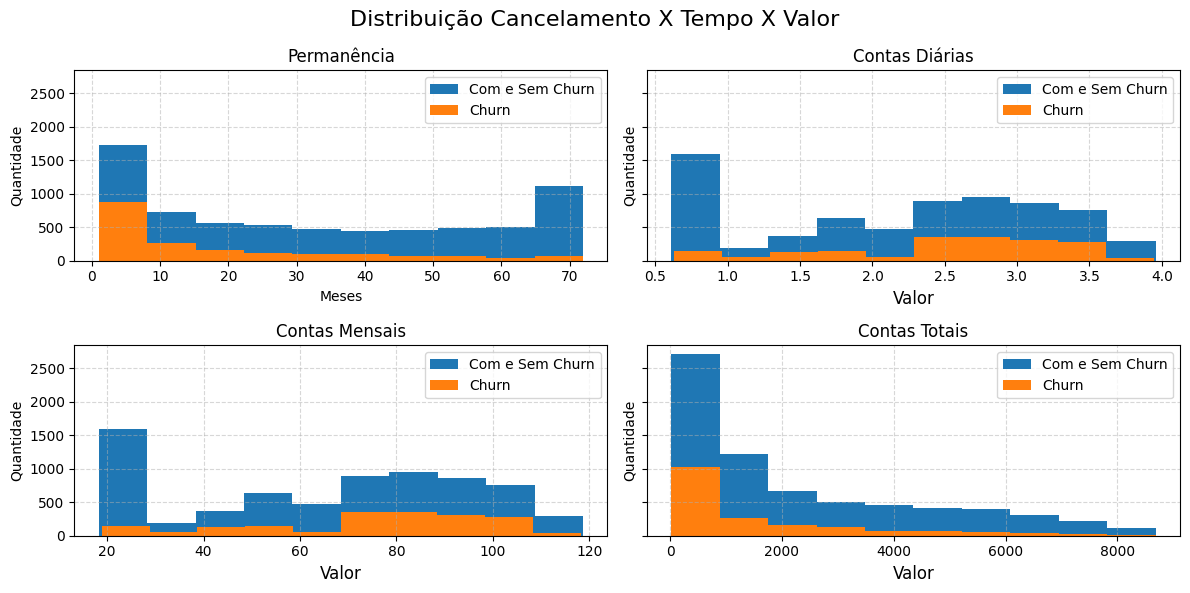

In [35]:
# CRIANDO VISUALISAÇÃO HISTORICA

#Configuração da figura
fig, axs = plt.subplots(2, 2, figsize=(12, 6), sharey=True, tight_layout=True)
fig.suptitle('Distribuição Cancelamento X Tempo X Valor', fontsize=16)

# Criando o plot Permanencia
axs[0,0].hist(df['Permanencia'], label='Com e Sem Churn')
axs[0,0].hist(df_churn['Permanencia'], label='Churn')
axs[0,0].set_title('Permanência')
axs[0,0].set_xlabel('Meses')
axs[0,0].set_ylabel('Quantidade')
axs[0,0].grid(axis='both', linestyle='--', alpha=0.5)
axs[0,0].legend()


#criado o plot Contas diarias
axs[0,1].hist(df['Contas_Diarias'], label='Com e Sem Churn')
axs[0,1].hist(df_churn['Contas_Diarias'], label='Churn')
axs[0,1].set_title('Contas Diárias')
axs[0,1].set_xlabel('Valor', fontsize=12)
axs[0,1].set_ylabel('Quantidade')
axs[0,1].grid(axis='both', linestyle='--', alpha=0.5)
axs[0,1].legend()

# Criando o plot Contas mensais
axs[1,0].hist(df['Contas_Mensal'], label='Com e Sem Churn')
axs[1,0].hist(df_churn['Contas_Mensal'], label='Churn')
axs[1,0].set_title('Contas Mensais')
axs[1,0].set_xlabel('Valor', fontsize=12)
axs[1,0].set_ylabel('Quantidade')
axs[1,0].grid(axis='both', linestyle='--', alpha=0.5)
axs[1,0].legend()

# Criando o plot Contas Totais
axs[1,1].hist(df['Contas_Total'], label='Com e Sem Churn')
axs[1,1].hist(df_churn['Contas_Total'], label='Churn')
axs[1,1].set_title('Contas Totais')
axs[1,1].set_xlabel('Valor', fontsize=12)
axs[1,1].set_ylabel('Quantidade')
axs[1,1].grid(axis='both', linestyle='--', alpha=0.5)
axs[1,1].legend()

fig.savefig('histograma.png')
plt.show()

#📄Relatorio Final

## 🧩 Introdução

> **O projeto proposto visa identificar o motivo raiz do churn de clientes da empresa TelecomX_BR, com o objetivo de entender o perfil desses clientes e trabalhar para identificar os motivos que os levaram a cancelar suas assinaturas. Considerando que o churn pode se tornar um grande problema se não for controlado e previsto.**

---

## 🧼 Limpeza e Tratamento de Dados

#### Bibliotecas Utilizadas

- Pandas  
- Numpy  
- Matplotlib  
- Seaborn  
- Plotly  
- Warnings  

> **Os dados foram importados via API em formato JSON. Para trabalhar com eles, transformamos o conteúdo em um DataFrame utilizando o Pandas (`pd.read_json`).**

#### Estruturação dos Dados

- Dividimos o DataFrame em partes (pequenos `dfs`)  
- Normalizamos cada parte (`pd.json_normalize`)  
- Reunimos novamente todas as partes (`pd.concat`)  

> *Nesta etapa, deixamos o DataFrame (`df`) pronto para a fase de transformação.*

#### Análise Inicial

- `df.head()` e `df.tail()`  
- `df.info()` para identificar tipos de dados e ausências  
  - Sem valores nulos, mas com tipos inconsistentes  
- `df.shape` para linhas e colunas  
- `df.columns` para entender a estrutura  
- `df.rename()` para renomear colunas  
- `df.duplicated().sum()` → Nenhuma duplicata  

#### Verificação de Dados Únicos

Utilizamos `for` com `df[col].unique()` para observar padrões e inconsistências.

> *Essa verificação ajudou a identificar padrões que não seriam visíveis com `df.nunique()`.*

#### Tratamentos Realizados

- Remoção de valores vazios (`' '`) nas colunas `Cancelamento` e `Contas_Total`  
- Conversão da coluna `Contas_Total` para `float`  
- Identificação de redundâncias:
  - Múltiplas linhas requerem ao menos uma linha de telefone  
  - Serviços online requerem conexão de internet  
  - Valores não aplicáveis foram unificados como `'No'`  

#### Transformações

- Tradução de alguns valores  
- Conversão de `'Yes'` / `'No'` para `1` / `0`  
- Criação da coluna `Contas_Diarias` para gastos diários.  


---
## 📈 Análise Exploratória

### 🔎 Correlações

| Variáveis                  | Correlação | Interpretação                                 |
|---------------------------|------------|-----------------------------------------------|
| Tempo de permanência x Churn | -0,35     | Quanto maior o tempo, menor o risco de churn |
| Conta diária x Churn         | +0,19     | Valores mais altos têm maior risco (fraco)   |
| Tempo x Total gasto          | +0,83     | Clientes antigos gastam mais                 |

## 🧩 Visão Geral dos Dados

- Total de clientes: 7.032
- Taxa geral de churn: **26,6%**
- Colunas categóricas: Gênero, Idoso, Tipo de Contrato, Serviços, etc.
- Colunas numéricas: Tempo de permanência, Conta mensal, Total gasto

---

## 💸 Impacto Financeiro

- Perda diária média: **R\$ 4.637,70**
- Perda mensal média: **R\$ 139.130,85**
- Perda acumulada: **R\$ 2.862.926,90**
---
#### **Análise de dados Categóricos**

> Para responder algumas perguntas sobre o churn dos clientes e como podemos trabalhar para evitar esse comportamento causando prejuizos para empresa.
Criamos um conjunto de gráficos para entender em qual categoria tem mais impacto no número de churn para ter insights.
  
  - Gênero
    - Masculino: Representa 49.8% dos cancelamentos.
    - Feminino: Representa 50.2% dos cancelamentos.

  - Idosos
    - 25.5% dos cancelamentos são idosos.
      - 23.11% desses 25,5% são referêntes a serviços de telefone.

  - Paceiros
    - 35.8% dos cancelamentos tem parceiros.
      - 33.4% desses 35,8 são referêntes a serviços de telefone.
        - 19.7% tinham Multiplas linhas telefonicas
  
  - Dependentes
    -  17.4% dos cancelamentos tem dependentes.
      - 16.2% dos 17.4% são referêntes a serviços telefonicos

  - Fatura online
    - 74.9% dos cancelamentos são referente a pagamentos online, porém a maioria dos métodos de pagamentos são online.

  - Metodo_Pagamento
    - Cancelamentos que usavam meios de pagamentos digitais:
      - Cheque Digital (Boleto)   57.3%
      - Transferencia bancaria    13.8%
      - Cartão Credito            12.4%

    - Cancelamentos que usavam meios de pagamentos físicos:
      - Cheque Correio (Boleto)   16.5%

  - Tipos de Contratos
    - Cancelamentos por tipos de contratos:
      - Mensal      88.6%
      - Anual        8.9%
      - Bi-Anual     2.6%

  - Serviços Telefonico
    - 90.1% dos cancelamentos foram referêntes a serviços telefonicos.
      - 45.5% dos 90.10% dos cancelamentos tinha multiplas linhas telefonicas.

  - Serviços Internet
      - Fibra Optica        69.4%
      - DSL                 24.6%
      - Nenhum servico      6.0%

  -  Quando comparamos serviços de telefone e serviços:
    - 76.3% dos cancelamentos de serviços telefonicos e serviços de internet cancelaram o serviço de Fibra Optica, 17% o serviço de DSL e 6.7% não tinha serviços de internet.
    - 84.8% dos clientes que cancelavam e tinham multiplas linhas telefonicas e também tinham serviços de internet, assinavam algum serviço online.


> Também Verificamos os dados temporais para saber como estão distribuidos nossos dados e conhecer os comportamentos dos clientes ao longo do tempo.


---
## ⏱️ Análise Temporal

  - Tempo de permanência
    - 40.1% dos cancelamentos acontece nos primeiros 8 mês dos clientes.
    - 20.3% dos cancelamentos acontecem no primeiro mês dos clientes.

  - Gastos diários
    - Clientes com gastos diarios entre $ 2.40 e \$ 3.6 tem o maior acumulado de cancelamentos.

  - Gastos mensais
    - Clientes com gastos mensais entre \$ 70.0 e \$110.0 tem o maior acumulado de cancelamentos.

  - Total de gastos
    - Historicamente os clientes que gastam em média até \$ 1000.0 no total com a TelecomX_BR.

> Com essas análises podemos tirar insights valiosos e desenvolver algumas ideias com a visão de diminuir o churn da TelecomX_BR.


## 🧠 Conclusões e Insights

Com os a exploração dos dados podemos visualizar indormações importante para poder diminuir com a evasão de clientes (Churn).

Temos Atualmente uma taxa de `26.6%` de evasão de nossos clientes, se tratando de numeros são `1.869` clientes deixaram de ser cliente, levando a uma perda de \$ `2.862.926,90` no faturamento da empresa.

**Perfil de Clientes Churn**
 - Em sua maioria não são clientes idosos (74.5%)
 - Em sua maioria não tem parceiros (64.2%) e também não tem dependentes (82.6%).
 - Pagamentos online oferecem facilidade de pagamentos e também oferencem facilidade de cancelamento, não sendo crucial para um insight valioso, mas quando olhamos para o método de pagamento podemos observar:

  - 57.3% são cheques digitais (boletos).
  - 16.5% são cheques correios (boletos).
    - Sendo assim, 73.8% de todos cancelamentos são na modalidade cheque (boleto).

 - Os serviços que os clientes mais cancelam são os serviços de telefone (90.1%) entre os cancelamentos, os clientes que tinham multiplas linhas representava (45.5%) do total.
  - Esses dados mostram que os clientes estão com problemas com nosso serviços de telefone, que esta afetando outros produtos de forma indireta.

 - Apenas 6.0% dos cancelamentos não tinha serviços de internet e o serviço que pesou nessa descisão é a Internet de Fibra Optica, apesar de não ter a confirmação que seja um serviço vendido junto com o serviço de telefone. Esta sendo o que mais recebe cancelamento (69.4%).

- 84.8% dos clientes que cancelavam e tinham multiplas linhas telefonicas e também tinham serviços de internet, assinavam algum serviço online.


**Insights**

Com essas analises podemos concluir que a TelecomX_BR está perdendo clientes por uma ineficiência em seu serviço de telefonia, comprometendo toda sua operação, para entender o preço aplicado precisariamos ir ao mercado e estudar concorrente e politicas de preço aplicadas.Porém antes de estudar sobre esse temas, precisa urgentemente alinhar e aplicar as melhorias na entrega de serviços telefonicos.  


## ✅ Recomendações


##### **Minhas Recomendações**

- Problemas de cancelamentos de serviços de telefone:
  - Contratar uma equipe técnica especializada ou oferecer treinamento especializado para melhorar o Serviços de atendimento ao cliente, suporte tecnico e serviços externos.
  
- Problemas com retenção de clientes:
  -  Como podemos verificar, a maioria dos clientes da TelecomX_BR são fieis em poucos meses em grande maioria dos casos de cancelamentos os clientes permaneceram apenas 1 mês.
    - Podemos oferecer planos com redução de preços, na aquisição de mais de uma linha.
    - Nos Serviços de internet oferecer backup online grátis por um tempo, ou outro serviços como bônus.
    -  Assintatura de TV a cabo recebe descontos para adquirir outros serviços onlines.
    - Melhorar o serviço de Internet com Fibra Optica e estudar a possibidada de manter apenas serviços do tipo DSL.
- Problemas com clientes assinantes com boletos.
  - Oferecer mensalidades e descontos para pagamento no cartão de crédito ou no deposito bancario.

> *Relatório técnico elaborado por Ellan Alves – TelecomX_BR.*
